# json 파일 다루기

In [14]:
import json

In [15]:
with open('E:\\다양한 형태의 한글 문자 OCR\\Training\\[라벨]Training_필기체\\1.글자\\002\\00230001001.json', encoding = "utf8") as f:
    json_object = json.load(f)

In [19]:
# 사진
json_object['image']['file_name']

'00230001001.jpg'

In [20]:
# 라벨
json_object['info']['text']

'가'

위 방법으로 라벨들을 하나의 tensor 형태로 저장해서 사용하면 될 듯.

코랩으로 돌리는게 나을 듯

# 이미지 <-> Numpy

In [31]:
import numpy as np
from PIL import Image
import torch

In [118]:
img = Image.open('E:\\다양한 형태의 한글 문자 OCR\\Training\\[원천]Training_필기체\\1.글자\\001\\00130001001.jpg')
img.show()

In [191]:
x = np.array(img)  # 이미지 -> 넘파이
print(x)
print(x.shape)   # (100,111,3)

[[[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [252 252 252]
  [252 252 252]
  [252 252 252]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [252 252 252]
  [252 252 252]
  [252 252 252]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  ...
  [252 252 252]
  [252 252 252]
  [252 252 252]]

 ...

 [[252 252 252]
  [252 252 252]
  [252 252 252]
  ...
  [253 253 253]
  [253 253 253]
  [252 252 252]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [253 253 253]
  [252 252 252]
  [252 252 252]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [252 252 252]
  [252 252 252]
  [252 252 252]]]
(110, 111, 3)


In [274]:
img_2 = Image.fromarray(x) # 넘파이 -> 이미지
img_2.show()

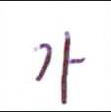

In [276]:
y = x.copy()

In [277]:
y[:,:,0]   # 기존 3차원 데이터를 3개 차원으로 나눌수 있음.

array([[253, 253, 253, ..., 252, 252, 252],
       [253, 253, 253, ..., 252, 252, 252],
       [253, 253, 253, ..., 252, 252, 252],
       ...,
       [252, 252, 252, ..., 253, 253, 252],
       [254, 254, 254, ..., 253, 252, 252],
       [254, 254, 254, ..., 252, 252, 252]], dtype=uint8)

In [278]:
y[:,:,0].shape

(110, 111)

In [280]:
img_3 = Image.fromarray(y[:,:,0]) # NumPy array to PIL image
img_3.show()

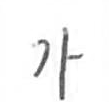

In [281]:
img_3 = Image.fromarray(y[:,:,1]) # NumPy array to PIL image
img_3`.show()

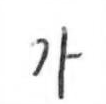

In [282]:
img_3 = Image.fromarray(y[:,:,2]) # NumPy array to PIL image
img_3.show()

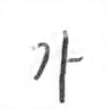

### 3개 차원의 글씨가 별 반 다를게 없어보임 => 학습 데이터 증가 가능
#### 약간 회전 하는 방식? => batch norm (어차피 모델에 포함 되어있음.)

In [290]:
scaled_y = y.copy()

In [291]:
scaled_y0 = scaled_y[:,:,0]
scaled_y1 = scaled_y[:,:,1]
scaled_y2 = scaled_y[:,:,2]

In [303]:
scaled_y0[(scaled_y0 >= 220)] = 255
scaled_y1[(scaled_y1 >= 220)] = 255
scaled_y2[(scaled_y2 >= 220)] = 255

In [304]:
scaled_y0[(scaled_y0 < 220)] = 0
scaled_y1[(scaled_y1 < 220)] = 0
scaled_y2[(scaled_y2 < 220)] = 0

#### 여기서 위 기준을 220이 아니라 240, 230, 220 으로 나누면 약간의 노이즈 차이 발생
=> 오버피팅 방지 효과도 있을 듯

In [308]:
img_3 = Image.fromarray(scaled_y0) # NumPy array to PIL image
img_3.show()

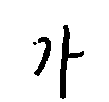

In [309]:
img_3 = Image.fromarray(scaled_y1) # NumPy array to PIL image
img_3.show()

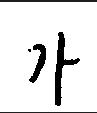

In [310]:
img_3 = Image.fromarray(scaled_y2) # NumPy array to PIL image
img_3.show()

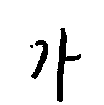